In [1]:
from pprint import pprint
import yaml


metadata =  """
fields:
  age:
    faker: [random_int, 0, 100]
  age2:
    faker: random_int
    min_value: 0
    max_value: 100
"""
parsed = yaml.safe_load(metadata)
pprint(parsed)

{'fields': {'age': {'faker': ['random_int', 0, 100]},
            'age2': {'faker': 'random_int', 'max_value': 100, 'min_value': 0}}}


In [3]:
import random

random.choices(["a", "b", "c"], weights=[0.5, 0.3, 0.1], k=10)

['a', 'a', 'a', 'a', 'c', 'a', 'a', 'a', 'c', 'a']

In [4]:
from faker import Faker
fake = Faker()

fake.pybool()

False

In [2]:
import yaml
metadata = None
with open("../metadata/multi_final.yaml", "r") as f:
    metadata = yaml.safe_load(f)

** id {'faker.unique': 'pyint', 'min_value': 0, 'max_value': 1000}
** name {'faker': 'first_name'}
** age {'faker': 'pyint', 'min_value': 25, 'max_value': 45}
** is_student {'random': 'choices', 'args': [[True, False]], 'weights': [0.6, 0.4]}
** favorite_color {'random': 'choices', 'args': [['red', 'blue', 'green']], 'weights': [0.4, 0.4, 0.2]}
** height {'random': 'gauss', 'mu': 170, 'sigma': 8}
** ssn {'faker': 'ssn'}
** id {'faker': 'pyint', 'min_value': 6, 'max_value': 10}
** condition {'random': 'choices', 'args': [['Heart Disease', 'Diabetes', 'High Blood Pressure', 'Asthma', 'Obesity']], 'weights': [0.2, 0.2, 0.2, 0.2, 0.2]}
** severity {'random': 'choices', 'args': [['Moderate', 'Severe', 'Mild']], 'weights': [0.4, 0.4, 0.2]}
** ssn {'relation': 'fuzzy_match', 'ref': 'people.ssn', 'weights': {'match': 0.7, 'fuzzy': 0.1, 'no_match': 0.2}}


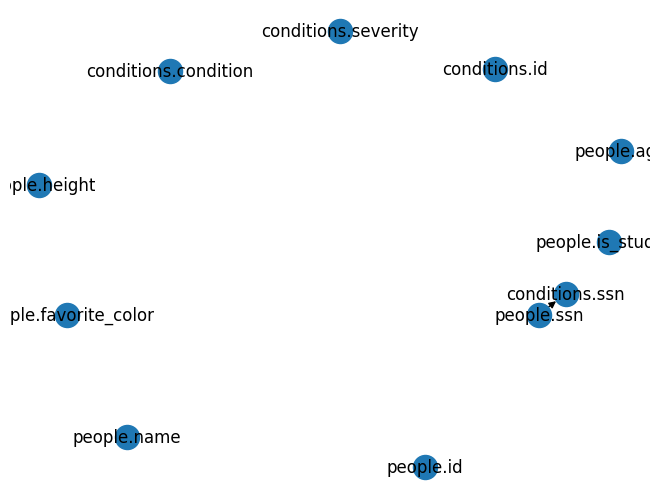

In [7]:
import networkx as nx

def get_node_name(table_name, field_name):
    return f"{table_name}.{field_name}"

def get_field_table_name(node_name):
    splitted = node_name.split(".")
    return (splitted[0], splitted[1])

def build_table_dag(table_name, table_metadata):
    table_dag = nx.DiGraph()
    for field_name, field_data in table_metadata['fields'].items():
        node_name = get_node_name(table_name, field_name)
        table_dag.add_node(get_node_name(table_name, field_name), data=None)
        if 'relation' in field_data:
            ref_table, ref_field = get_field_table_name(field_data['ref'])
            table_dag.add_edge(get_node_name(ref_table, ref_field), node_name)
    return table_dag

def build_dag(metadata):
    table_dags = {}
    for table_name, table_data in metadata['tables'].items():
        table_dags[table_name] = build_table_dag(table_name, table_data)
    return nx.compose_all(table_dags.values())
    
dag = build_dag(metadata)
nx.draw(dag, with_labels=True)

In [9]:
list(nx.topological_sort(dag))

['people.id',
 'people.name',
 'people.age',
 'people.is_student',
 'people.favorite_color',
 'people.height',
 'people.ssn',
 'conditions.id',
 'conditions.condition',
 'conditions.severity',
 'conditions.ssn']